In [1]:
from src.models import Sequential
from src.layers import *
from src.activation_functions import *
from src.loss_functions import *

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
from tensorflow.keras.datasets.mnist import load_data as load_data_MNIST

(x_train, y_train), (x_test, y_test) = load_data_MNIST() # MNIST

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train_expanded = np.expand_dims(x_train, 1)
x_test_expanded = np.expand_dims(x_test, 1)

In [5]:
le = OneHotEncoder(sparse_output=False)

y_train_encoded = le.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = le.fit_transform(y_test.reshape(-1, 1))

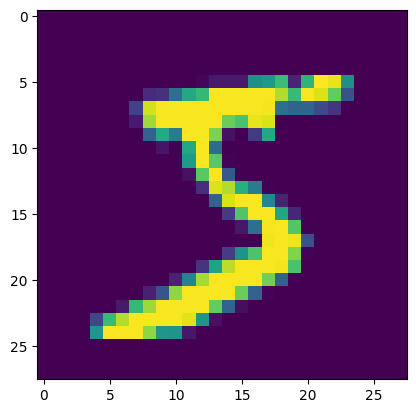

In [6]:
plt.imshow(np.einsum("chw -> hwc", x_train_expanded[0]))

In [29]:
model = Sequential(epochs=10, learning_rate=0.0001, loss_function=CrossEntropy(), batch_size=512)

In [30]:
model.add(Conv2D(
    n_inputs=1,
    n_outputs=3,
    filter_size=3,
    stride=1,
    padding=0
))
model.add(Activation(ReLU()))
model.add(Flatten())
model.add(Linear(n_inputs=2028, n_outputs=10))
model.add(Activation(Softmax()))

In [31]:
model.train(x_train_expanded[:10000], y_train_encoded[:10000])

100%|██████████| 10/10 [01:14<00:00,  7.47s/it,  Loss: 0.31610461099114595]


In [32]:
model.layers[0].weights.shape

(1, 3, 3, 3)

In [33]:
y_pred = model.predict(x_test_expanded)

Czulosc: 1.0
Swoistosc: 1.0
Accuracy: 1.0
F1 score: 0.8996360074427416
BA score: 0.899671445398722


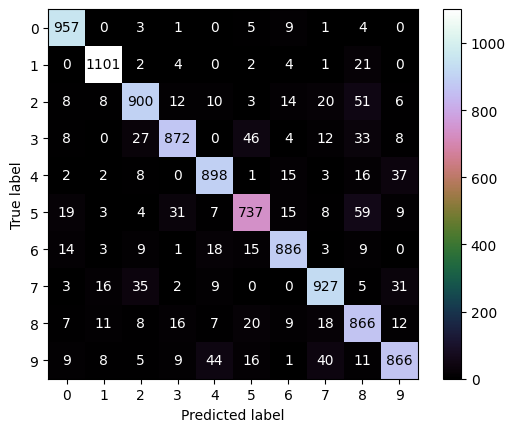

In [34]:
y_pred2 = np.argmax(y_pred, axis=1)
y_test2 = y_test

cm_model = confusion_matrix(y_test2, y_pred2)

tn_model = cm_model[0][0]
fn_model = cm_model[0][1]
tp_model = cm_model[1][1]
fp_model = cm_model[1][0]
ConfusionMatrixDisplay(cm_model).plot(cmap='cubehelix')

# fpr, tpr, roc_auc = roc_curve(y_test, y_pred)
#
# rok_model = RocCurveDisplay(fpr=fpr, tpr=tpr)
# rok_model.plot()

print("Czulosc:", tp_model / (tp_model + fn_model))
print("Swoistosc:", tn_model / (tn_model + fp_model))
print("Accuracy:", (tp_model + tn_model) / (tp_model + tn_model + fp_model + fn_model))

# print("ROC auc:", roc_auc_score(y_test, y_pred))
print("F1 score:", f1_score(y_test2, y_pred2, average='macro'))
print("BA score:", balanced_accuracy_score(y_test2, y_pred2))